# **Cement Strength Prediction Model Using Machine Learning**

### **Prof.Chandan D.Chaudhari**


In [1]:
# Data manipulation Library
import pandas as pd
import numpy as np
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler
# Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Filter Warnings Library
import warnings
warnings.filterwarnings('ignore')

# Setting Theme for Data Visualization and Processing
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')

# Importing Sklearn Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [2]:
# Importing Dataset Using Pandas Function

try:
  data = pd.read_csv('concrete_data.csv')
  print('Data Imported Successfully')

except:
  print('Please Check Data Connection')

Data Imported Successfully


In [3]:
# Loading the DataFrame
print(data.head())

   cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4            825.5  360                          44.30  


# **Problem Statement: Build a ML Model, which will predict the strength of the cement, by studying this 8 independent features.**



In [4]:
import pandas as pd
import numpy as np
from collections import OrderedDict

def custom_summary(data):
    # List to store summary information for numerical data
    numerical_result = []

    for i in data.columns:
        if data[i].dtype != 'object':
            Q1 = np.percentile(data[i], 25)
            Q3 = np.percentile(data[i], 75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Checking for outliers
            outliers = data[(data[i] < lower_bound) | (data[i] > upper_bound)]
            outlier_present = not outliers.empty

            stats = OrderedDict({
                'Feature Name': i,
                'Count': data[i].count(),
                'Mean': data[i].mean(),
                'Std': data[i].std(),
                'Min': data[i].min(),
                '25%': Q1,
                '50%': np.percentile(data[i], 50),
                '75%': Q3,
                'Max': data[i].max(),
                'Variance': data[i].var(),
                'Skewness': data[i].skew(),
                'Kurtosis': data[i].kurt(),
                'Outliers Present': outlier_present,
                'Number of Outliers': len(outliers)
            })
            numerical_result.append(stats)

    # Creating DataFrame for Numerical Summary
    numerical_summary = pd.DataFrame(numerical_result)

    # For Categorical Data
    categorical_result = []
    for i in data.columns:
        if data[i].dtype == 'object':
            stats = OrderedDict({
                'Feature Name': i,
                'Unique Values': data[i].nunique(),
                'Top': data[i].mode()[0],
                'Frequency': data[i].value_counts().iloc[0]
            })
            categorical_result.append(stats)

    # Creating DataFrame for Categorical Summary
    categorical_summary = pd.DataFrame(categorical_result)

    return numerical_summary, categorical_summary

# Example usage:
# Assuming 'data' is your DataFrame
numerical_summary, categorical_summary = custom_summary(data)

Numerical_data  = pd.DataFrame(numerical_summary)
Categorical_data = pd.DataFrame(categorical_summary)

Numerical_data

,Feature Name,Count,Mean,Std,Min,25%,50%,75%,Max,Variance,Skewness,Kurtosis,Outliers Present,Number of Outliers
0,cement,1030,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0,10921.580220,0.509481,-0.520652,False,0
1,blast_furnace_slag,1030,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4,7444.124812,0.800717,-0.508175,True,2
2,fly_ash,1030,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1,4095.616541,0.537354,-1.328746,False,0
3,water,1030,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0,456.002651,0.074628,0.122082,True,9
4,superplasticizer,1030,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2,35.686781,0.907203,1.411269,True,10
5,coarse_aggregate,1030,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0,6045.677357,-0.040220,-0.599016,False,0
6,fine_aggregate,1030,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6,6428.187792,-0.253010,-0.102177,True,5
7,age,1030,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0,3990.437729,3.269177,12.168989,True,59
8,concrete_compressive_strength,1030,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6,279.081814,0.416977,-0.313725,True,4


In [5]:
# Checking Box Plot for Outlier Detection

def boxen_plot(data):
    plt.figure(figsize=(20, 10))
    plot = 1

    for i in range(len(data.columns)):
        if data[data.columns[i]].dtype != 'object':
            plt.subplot(3, 3, plot)  # Create subplot in a 3x3 grid
            sns.boxenplot(data[data.columns[i]], color='maroon')
            plt.xlabel(data.columns[i])
            plot += 1

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

In [6]:
# Checking Distribution Plot

def dist_plot(data):
  plt.figure(figsize=(25,10))
  plot = 1
  for i in data.columns:
    if data[i].dtype != 'object':
      plt.subplot(3,3,plot)
      sns.distplot(data[i],color = 'maroon')
      plt.xlabel(i)
      plt.ylabel('Density')
      plot+=1
  plt.tight_layout
  plt.show()

In [7]:
def pairplot(data):
  sns.pairplot(data)
  plt.tight_layout()
  plt.show()

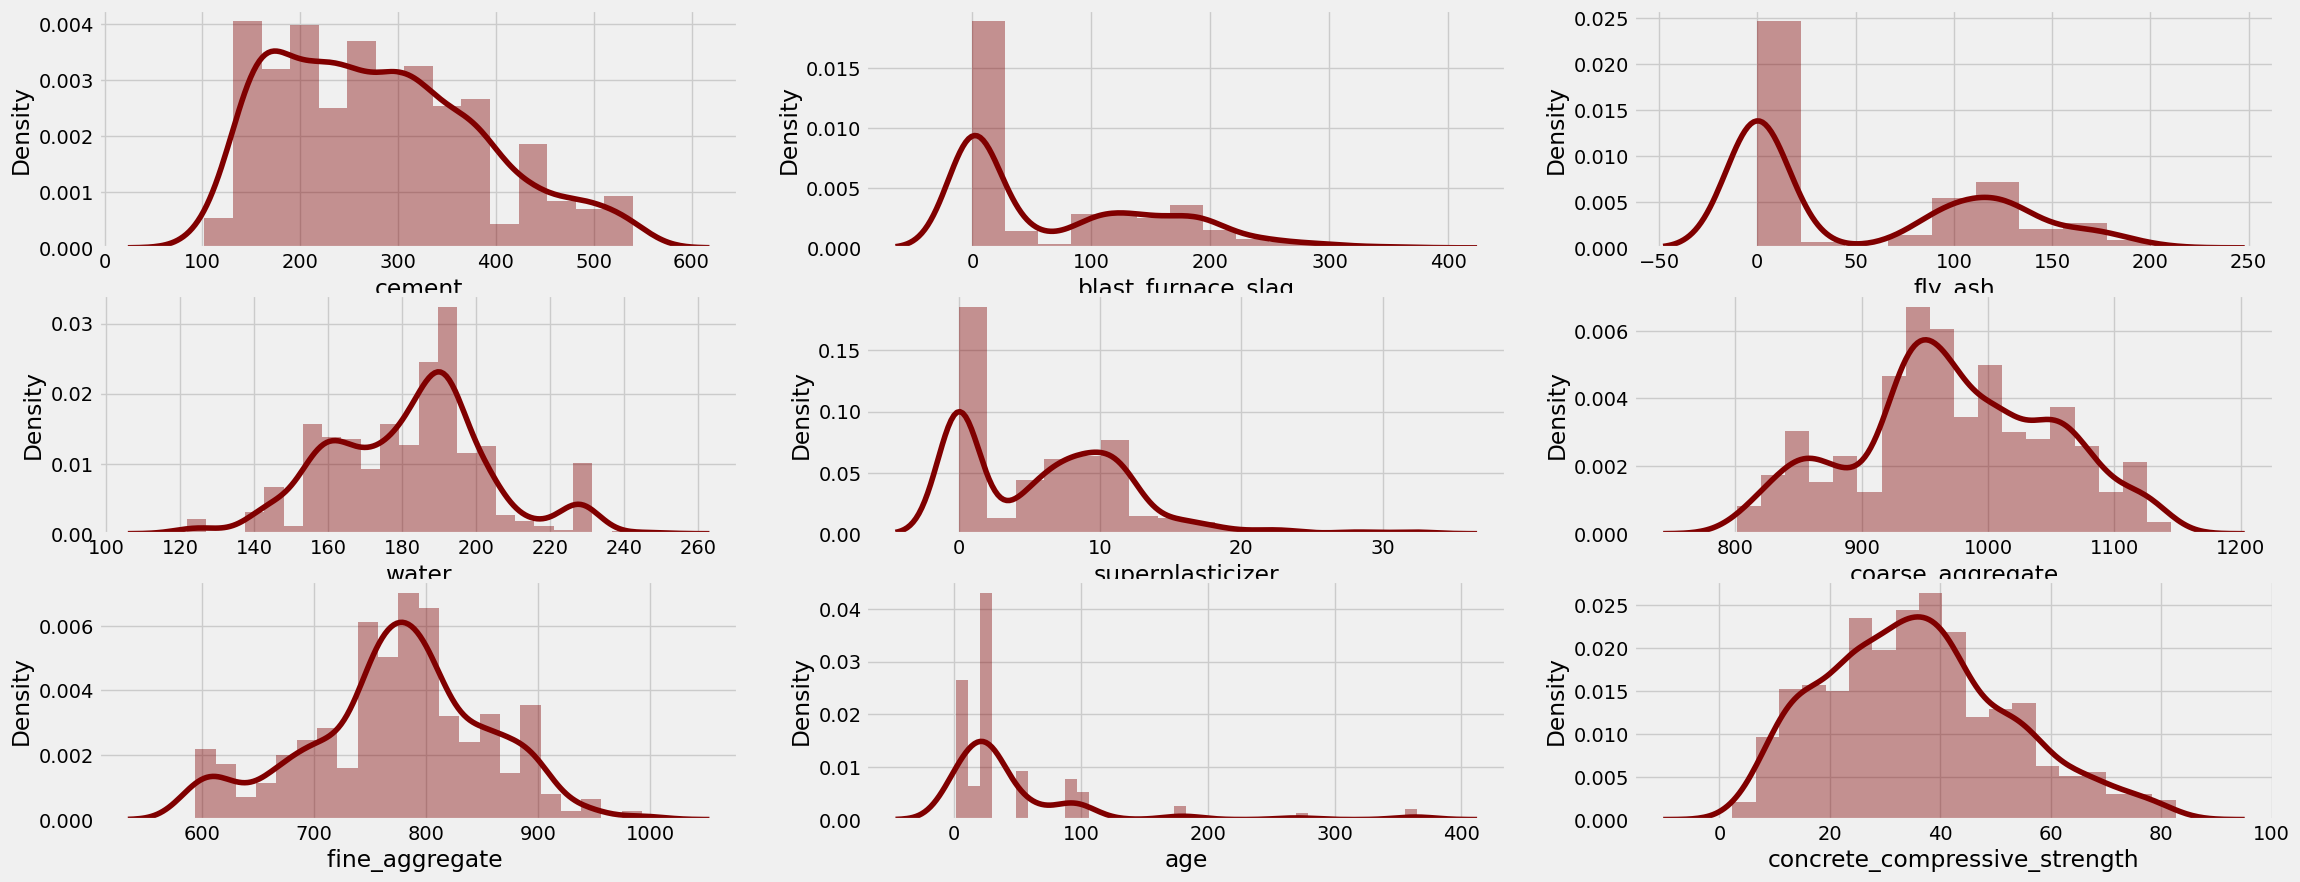

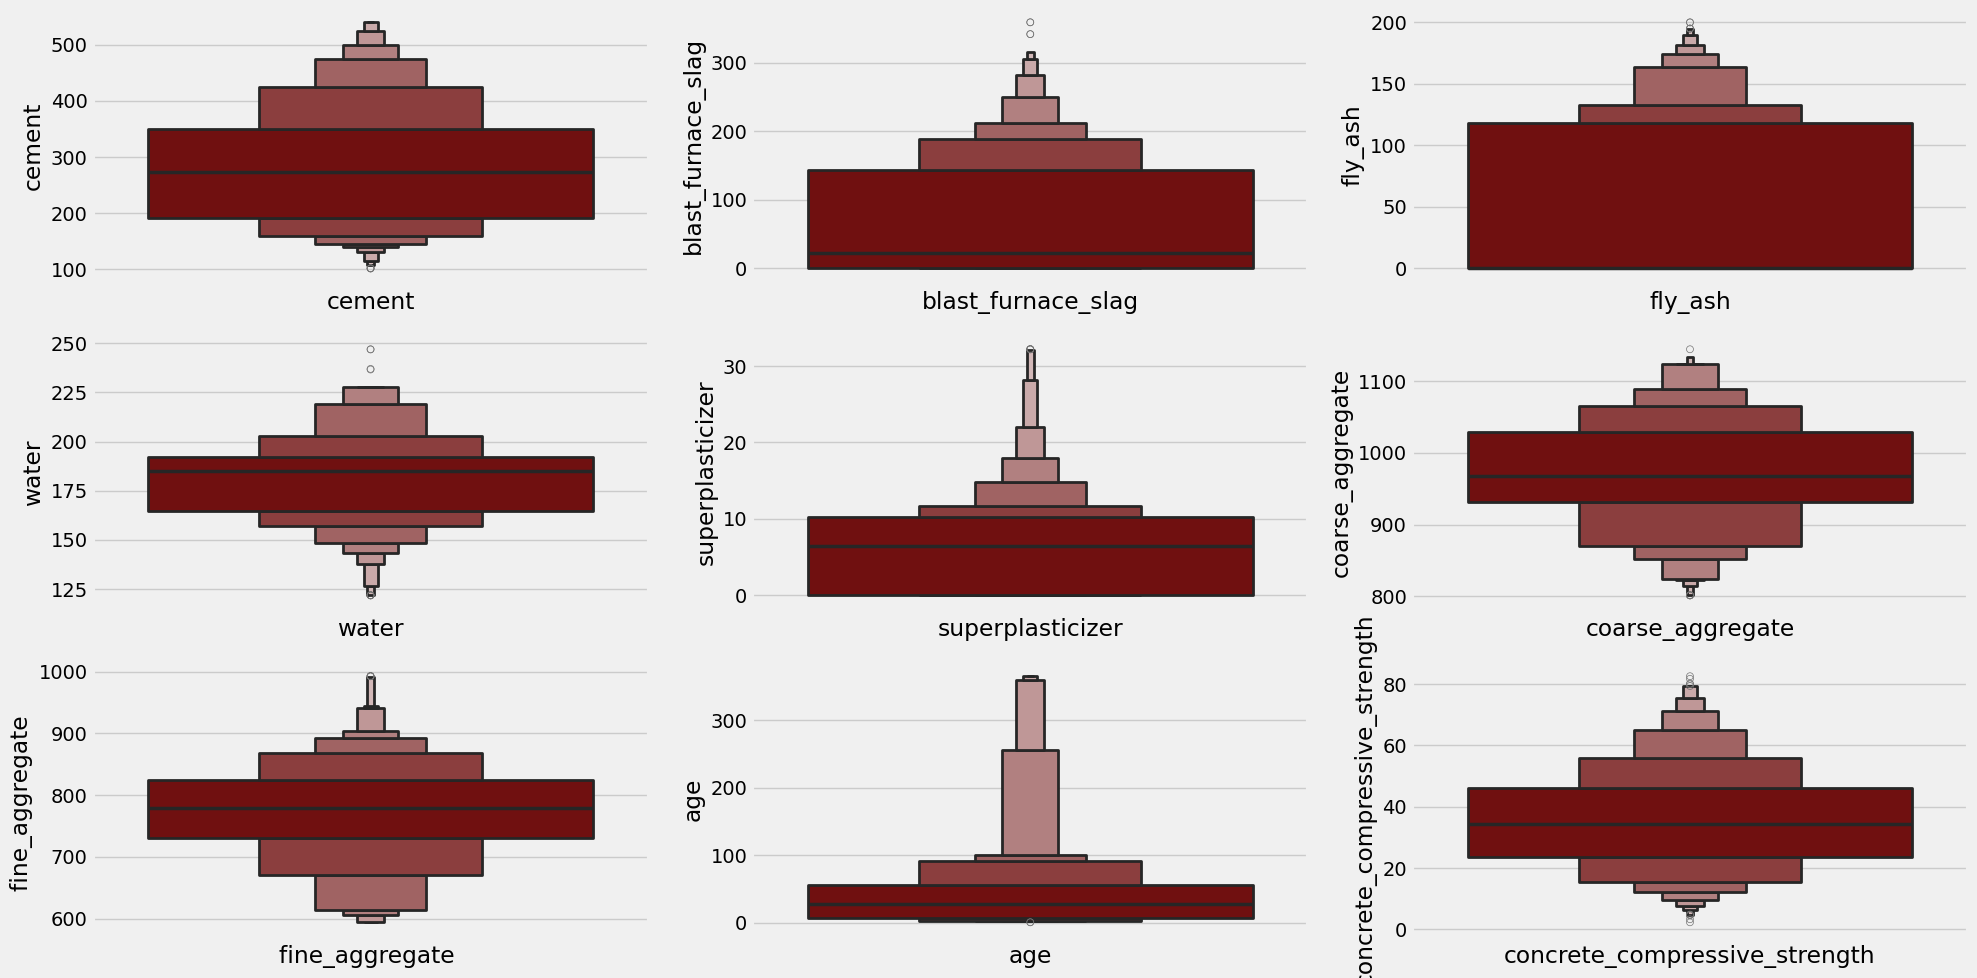

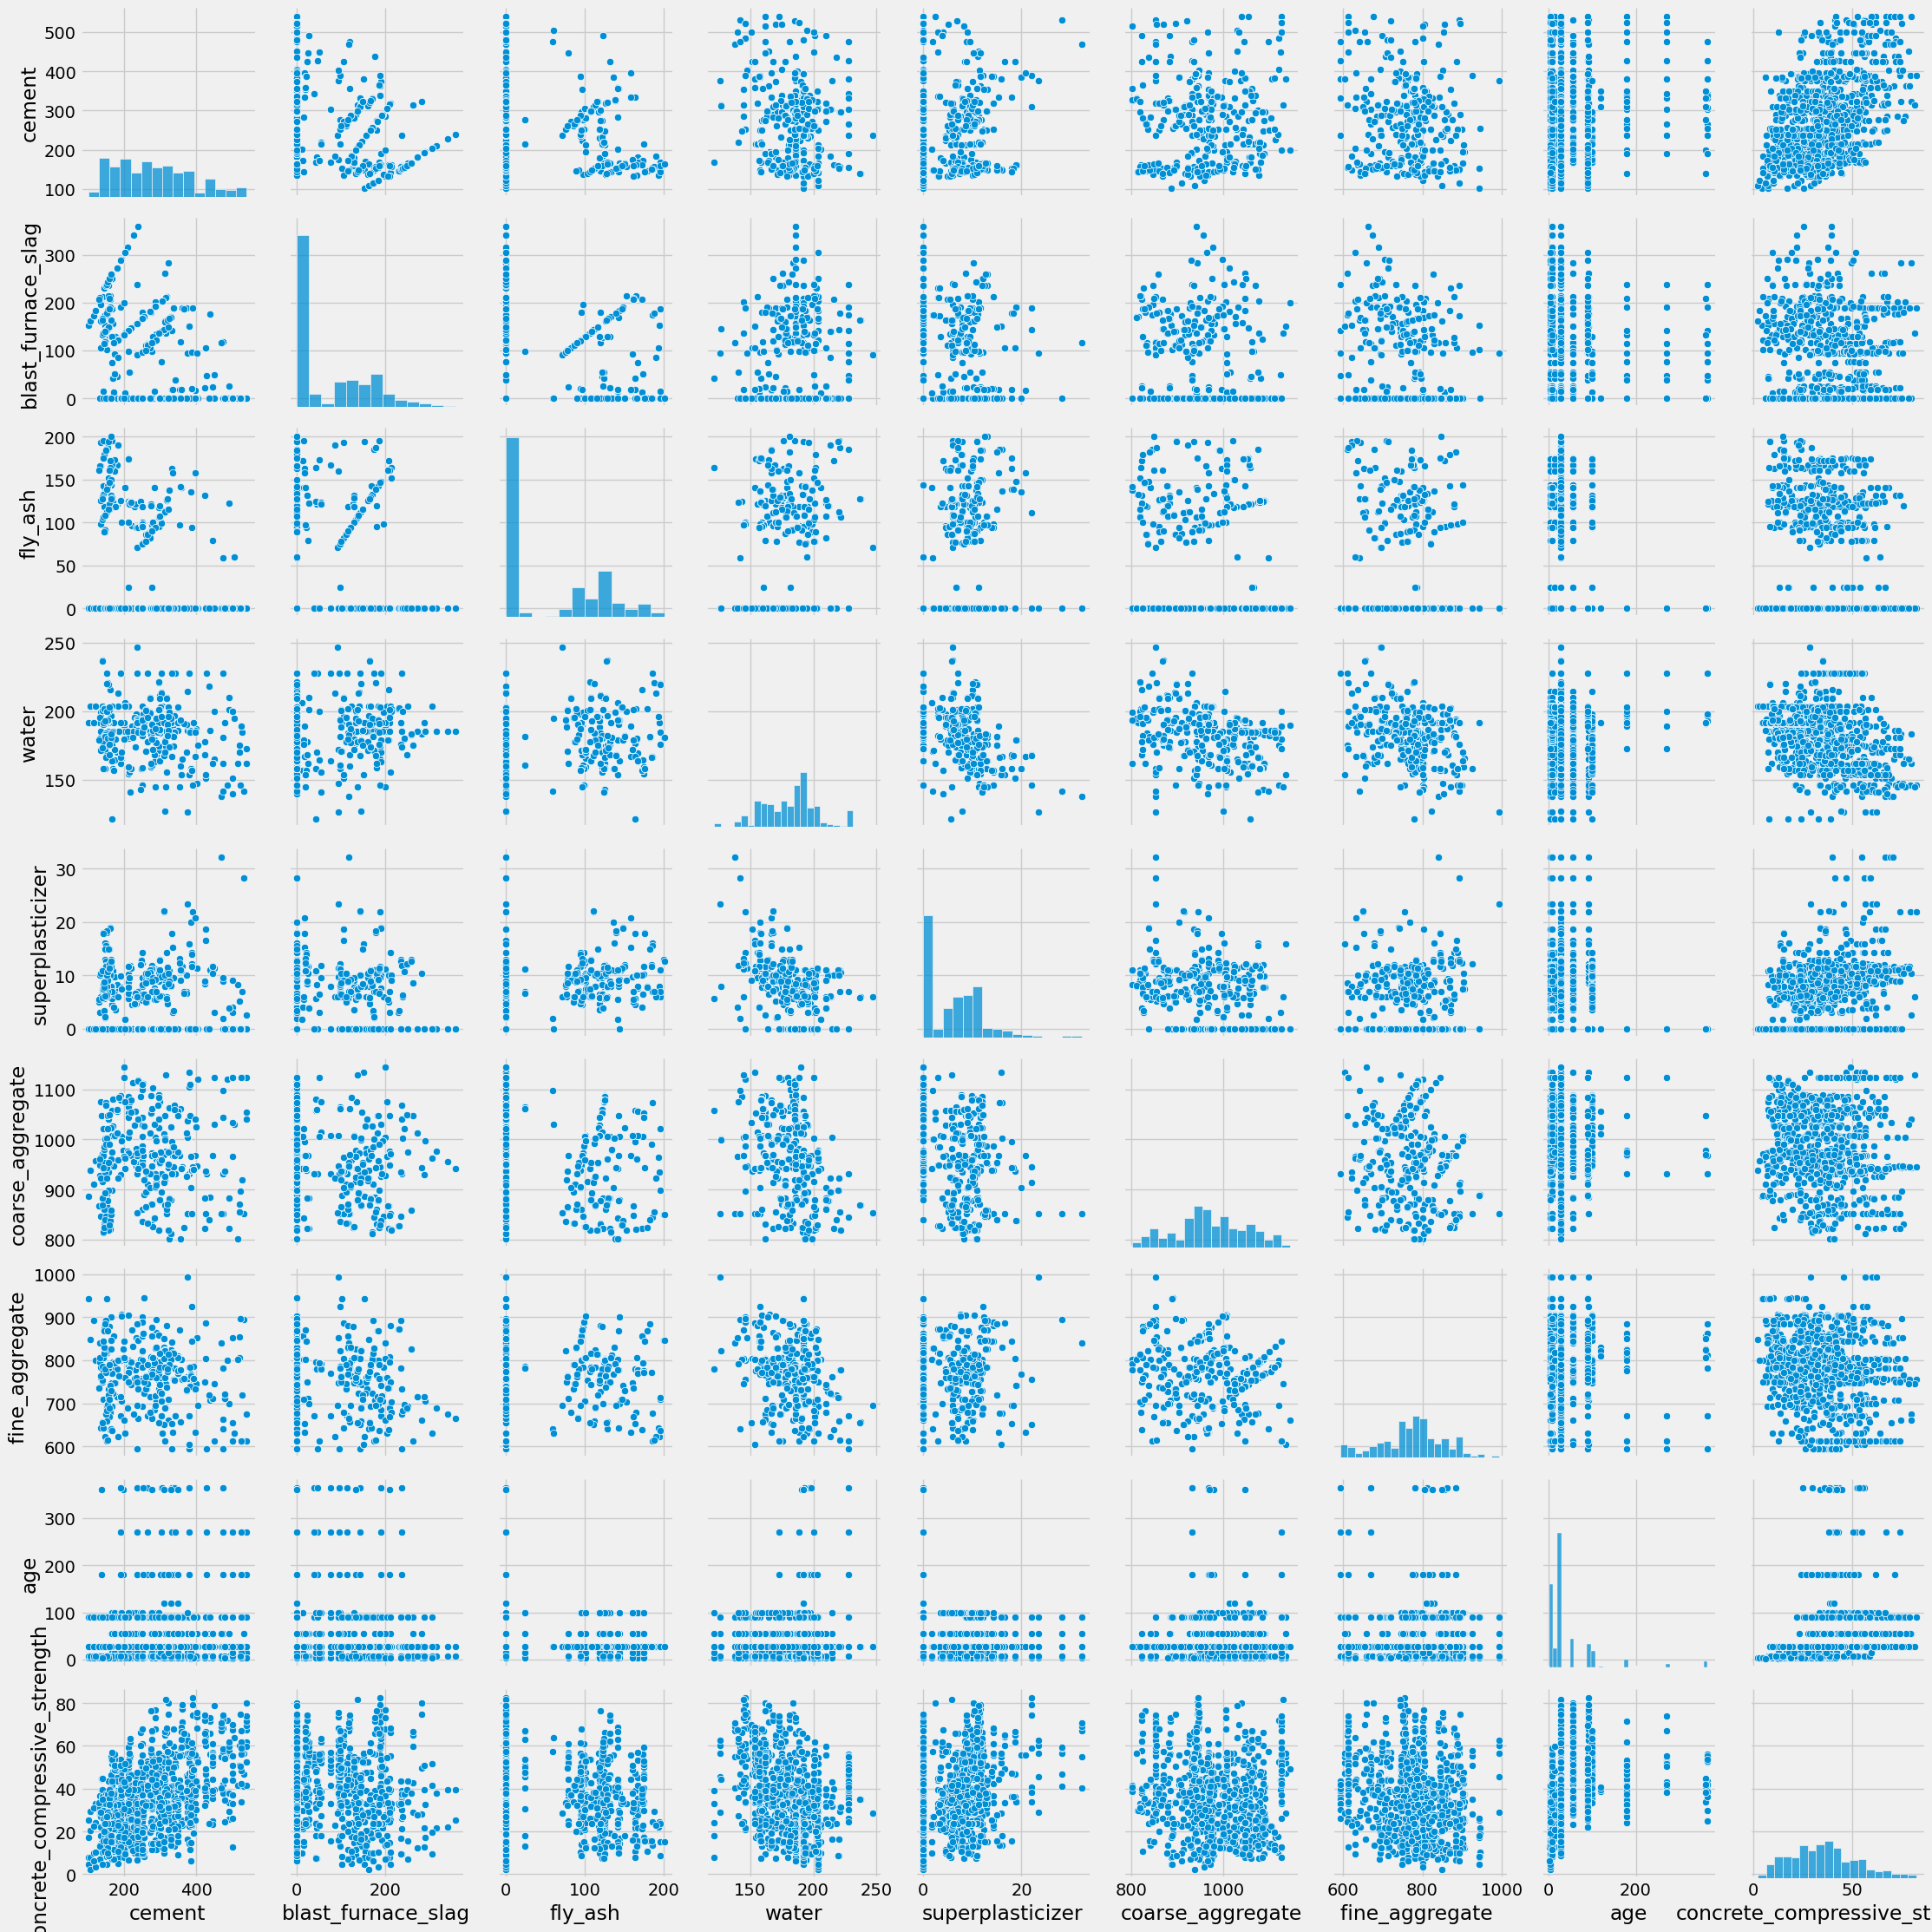

In [8]:
dist_plot(data)
boxen_plot(data)
pairplot(data)

<Axes: >

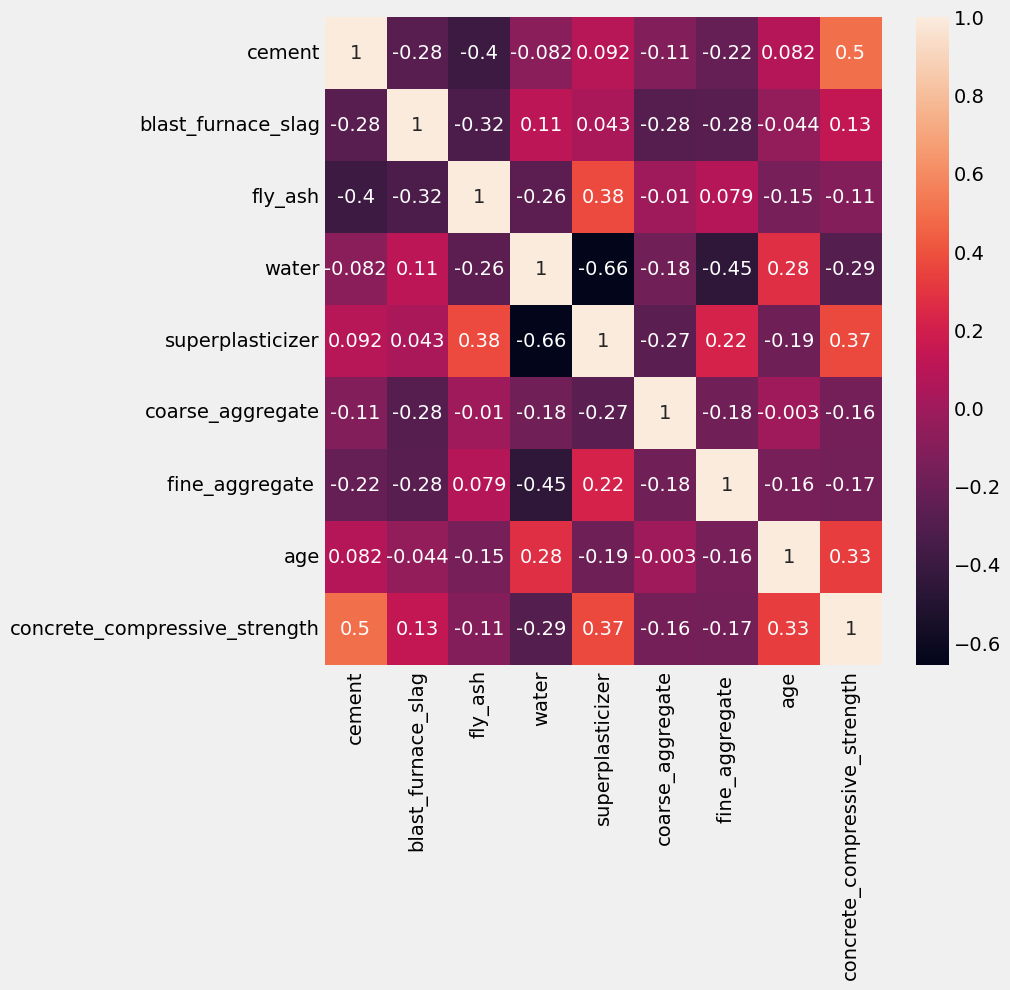

In [9]:
# Checking Multicolinearity Test
corr = data.corr()
data.ax = plt.subplots(figsize = (8,8))
sns.heatmap(corr, annot = True)

In [10]:
# Evaluating VIF Score
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(features):
    vif = pd.DataFrame()
    vif['vif'] = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    vif['features'] = features.columns
    vif = vif.sort_values(by = 'vif' , ascending = False)
    return vif

VIF(data.drop('concrete_compressive_strength' , axis=1))

,vif,features
5,84.955779,coarse_aggregate
3,82.157569,water
6,72.790995,fine_aggregate
0,15.456717,cement
4,5.471094,superplasticizer
2,4.147833,fly_ash
1,3.329127,blast_furnace_slag
7,1.699459,age


In [11]:
def train_and_test_split(data, tcol, testSize=0.3, randomState = 3):
    X = data.drop(tcol,axis=1)
    y = data[tcol]
    for column in X.columns:
      X[column] += 1
      X[column] = np.log(X[column])
    return train_test_split(X,y,test_size = testSize,random_state=randomState)

In [12]:
def model_builder(model_name, model, data, t_col):
    X_train,X_test,y_train,y_test = train_and_test_split(data,t_col)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    result = [model_name, rmse, r2]
    return result

In [13]:
def multiple_models(data, t_col):
    col_names=['Model Name','rmse','r2_score']
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = model_builder('Linear Regression',LinearRegression(),data,t_col)
    result.loc[len(result)] = model_builder('Lasso',Lasso(),data,t_col)
    result.loc[len(result)] = model_builder('Ridge',Ridge(),data,t_col)
    result.loc[len(result)] = model_builder('Decision Tree',DecisionTreeRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('SVR',SVR(),data,t_col)
    result.loc[len(result)] = model_builder('KNN',KNeighborsRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('Random Forest',RandomForestRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('Gradient Boost',GradientBoostingRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('ADA Boost',AdaBoostRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('XG Boost',XGBRegressor(),data,t_col)
    return result.sort_values(by = 'r2_score', ascending=False)

In [14]:
multiple_models(data, 'concrete_compressive_strength')

,Model Name,rmse,r2_score
9,XG Boost,4.575292,0.930187
6,Random Forest,4.965182,0.917782
7,Gradient Boost,5.037300,0.915376
3,Decision Tree,6.292607,0.867943
5,KNN,6.936666,0.839528
0,Linear Regression,7.453152,0.814741
2,Ridge,7.483067,0.813251
8,ADA Boost,8.191210,0.776234
1,Lasso,8.811280,0.741073
4,SVR,11.460360,0.561978


In [15]:
def k_fold_cv(X, y , fold= 10):
    score_LR = cross_val_score(LinearRegression(), X, y ,cv = fold)
    score_LS = cross_val_score(Lasso(), X, y, cv = fold)
    score_RD = cross_val_score(Ridge(), X, y, cv = fold)
    score_DTR = cross_val_score(DecisionTreeRegressor(), X, y, cv = fold)
    score_SVR = cross_val_score(SVR(), X, y ,cv = fold)
    score_KNN = cross_val_score(KNeighborsRegressor(), X, y ,cv = fold)
    score_RF = cross_val_score(RandomForestRegressor(), X, y ,cv = fold)
    score_GB = cross_val_score(GradientBoostingRegressor(), X, y, cv = fold)
    score_ADA = cross_val_score(AdaBoostRegressor(), X, y, cv = fold)
    score_XG = cross_val_score(XGBRegressor(), X, y, cv = fold)



    model_name = ['Linear Regression','Lasso','Ridge','DTR','SVR','KNN','Random Forest','Gradient Boost','ADA Boost','XG' ]
    scores = [score_LR,score_LS,score_RD,score_DTR,score_SVR,score_KNN,score_RF,score_GB,score_ADA,score_XG]
    result = []
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name,score_mean,score_std]
        result.append(temp)
    k_fold_df = pd.DataFrame(result,columns = ['Model Name','CV Accuracy','CV STD'])
    return k_fold_df.sort_values('CV Accuracy',ascending= False)

In [16]:
k_fold_cv(data.drop('concrete_compressive_strength',axis=1), data['concrete_compressive_strength'])

,Model Name,CV Accuracy,CV STD
7,Gradient Boost,0.753926,0.105262
9,XG,0.744767,0.137239
6,Random Forest,0.731941,0.143385
8,ADA Boost,0.566364,0.065449
3,DTR,0.442125,0.438638
2,Ridge,0.278209,0.522104
0,Linear Regression,0.278207,0.522110
1,Lasso,0.277437,0.508414
5,KNN,0.245878,0.460293
4,SVR,-0.076508,0.366398


In [17]:
from sklearn.model_selection import GridSearchCV

def hyperparameter_tuning(X, y):
    # Define models and their respective parameter grids
    param_grid = {
        'LinearRegression': {
            'model': LinearRegression(),
            'params': {}
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.01, 0.1, 1, 10, 100]
            }
        },
        'Ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.01, 0.1, 1, 10, 100]
            }
        },
        'DecisionTreeRegressor': {
            'model': DecisionTreeRegressor(),
            'params': {
                'max_depth': [5, 10, 15, 20],
                'min_samples_split': [2, 5, 10]
            }
        },
        'SVR': {
            'model': SVR(),
            'params': {
                'C': [0.1, 1, 10],
                'gamma': [0.001, 0.01, 0.1]
            }
        },
        'KNeighborsRegressor': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [3, 5, 7, 9],
                'weights': ['uniform', 'distance']
            }
        },
        'RandomForestRegressor': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5, 10]
            }
        },
        'GradientBoostingRegressor': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7]
            }
        },
        'AdaBoostRegressor': {
            'model': AdaBoostRegressor(),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 1.0]
            }
        },
        'XGBRegressor': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7]
            }
        }
    }

    results = []

    # Loop over each model and perform GridSearchCV
    for model_name, mp in param_grid.items():
        print(f"Performing Grid Search for {model_name}...")
        grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='r2')
        grid_search.fit(X, y)

        # Store the best model and its performance
        best_score = grid_search.best_score_
        best_params = grid_search.best_params_
        results.append([model_name, best_score, best_params])

    # Create a DataFrame with the results
    tuning_results = pd.DataFrame(results, columns=['Model Name', 'Best CV Score', 'Best Parameters'])

    # Sort the DataFrame by the best cross-validation score
    return tuning_results.sort_values('Best CV Score', ascending=False)


In [18]:
X = data.drop(['concrete_compressive_strength'],axis=1)
y = data['concrete_compressive_strength']
tuning_results = hyperparameter_tuning(X, y)
tuning_results

Performing Grid Search for LinearRegression...
Performing Grid Search for Lasso...
Performing Grid Search for Ridge...
Performing Grid Search for DecisionTreeRegressor...
Performing Grid Search for SVR...
Performing Grid Search for KNeighborsRegressor...
Performing Grid Search for RandomForestRegressor...
Performing Grid Search for GradientBoostingRegressor...
Performing Grid Search for AdaBoostRegressor...
Performing Grid Search for XGBRegressor...


,Model Name,Best CV Score,Best Parameters
9,XGBRegressor,0.521887,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
7,GradientBoostingRegressor,0.493519,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
1,Lasso,0.479348,{'alpha': 10}
2,Ridge,0.461554,{'alpha': 100}
0,LinearRegression,0.460994,{}
8,AdaBoostRegressor,0.448374,"{'learning_rate': 1.0, 'n_estimators': 200}"
6,RandomForestRegressor,0.345386,"{'max_depth': 10, 'min_samples_split': 2, 'n_e..."
5,KNeighborsRegressor,0.307287,"{'n_neighbors': 9, 'weights': 'distance'}"
3,DecisionTreeRegressor,0.250023,"{'max_depth': 20, 'min_samples_split': 2}"
4,SVR,-0.108953,"{'C': 10, 'gamma': 0.001}"
